In [1]:
import numpy as np
import matplotlib.pyplot as plt

muks = 0.7
g = 9.8
R = 0.05
omega = 10.0
mukp = 0.05
ms = 0.5
mp = 5.0

vsphere = []
vplatform = []
time = []

In [2]:
# Phase I

alpha = -5/2*muks*g/R
t = 2/7*omega*R/(muks*g)
vf = 2/7*omega*R

print ("alpha, t, vf = ",alpha,t,vf)

alpha, t, vf =  -343.0 0.02082465639316951 0.14285714285714285


In [3]:
ap = -(muks*ms/mp - mukp*(mp+ms)/mp)*g
vfp = ap*t
vfp1 = vfp

print ("ap = ",ap,vfp)

ap =  -0.14699999999999988 -0.0030612244897959156


In [4]:
# Phase II

ap = mukp*(mp+ms)/mp*g
vip = vfp
vfp = 0.0
t_extra = (vfp-vip)/ap
t_total = t + t_extra

print ("ap = ",ap,t_extra,t_total)

ap =  0.5390000000000001 0.005679451743591679 0.02650410813676119


In [5]:
# Phase 1
for i in range(100):
    time.append((i+1)*t/100)
    vsphere.append(muks*g*time[i] - (muks*ms/mp-mukp*(mp+ms)/mp)*g*time[i])
    vplatform.append(-(muks*ms/mp-mukp*(mp+ms)/mp)*g*time[i])
    #print(time[i],vsphere[i],vplatform[i])

In [6]:
# phase II
ap2 = mukp*(ms+mp)/mp*g
for i in range(100):
    time.append(t+(i+1)*t_extra/100)
    tex=(time[i+100]-t)
    vsphere.append(2/7*omega*R + (vfp1 + ap2*tex))
    vplatform.append(vfp1 + ap2*tex)
    #print(time[i+100],tex,vsphere[i+100],vplatform[i+100])

In [7]:
# Phase III
for i in range(100):
    time.append(time[199]+i*.0001)
    vplatform.append(0.0)
    vsphere.append(2/7*omega*R)

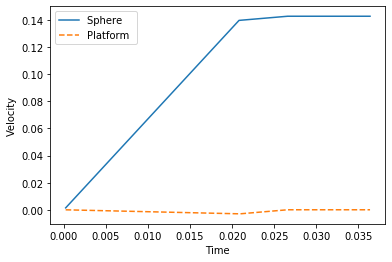

In [8]:
fig = plt.figure()
plt.plot(time,vsphere,'-',time,vplatform,'--')
plt.legend(['Sphere ','Platform '])
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.show()